# Вычислительная математика
## 4.1 Численное Интегрирование

Иван Цыбулин, Ярослав Холодов, Лукьянчук Вячеслав

Содержание семинара:
- Задача численного интегрирования
- Общая философия численного решения - правило квадратур
- Построение простейших квадратур
- Аппроксимация интегралов на малом отрезке
    - Интерполяция подынтегральной функции
    - Пример _элементерных_ и _составных_ квадратур
- Погрешность (теоретическая) и точность составных квадратур
    - Графики фактических погрешностей для простых квадратур
- Практическая оценка погрешности
    - Правило Рунге
- Алгоритм оценки погрешности
    - Проверка правила Рунге
- Экстраполяция Ричардсона и алоритм Ронберга увеличения точности
- Квадратуры Гаусса-Лежандра
- Интегралы с особенностями
- Интегралы быстроосциллирующих функций

## Задача численного интегрирования

Требуется вычислить определенный интеграл
$$
\int_a^b f(x) dx
$$
Интеграл предполагается собственным, то есть $a, b \neq \infty$, $|f(x)| < \infty$.

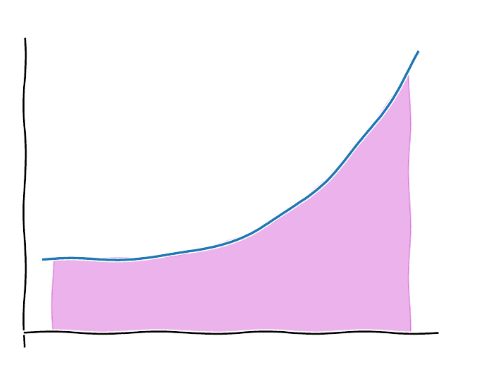

## Общий подход к решению - правило квадратур

Определим следующую штуку (правило квадратур) на определенных "узлах" отрезка $[a, b]$:

$$
Q^{(N)}=\sum_{k=1}^N w_k f\left(x_k\right),
$$

Её можно вычислить численно, так что хотим, чтобы она приближала искомый интеграл:

$$
I=\int_a^b f(x) d x
$$

Тогда невязка, как обычно, "что хотим" минус "что имеем":

$$
R^{(N)}=I-Q^{(N)} \rightarrow 0, \quad N \rightarrow \infty
$$

Естественно, хотим, чтобы $R^{(N)} \rightarrow 0$ при $N \rightarrow \infty$

## Построение простейших квадратур

Определим сетку на отрезке:

$$
a=x_0<x_1<\cdots<x_N=b
$$

И разложим интеграл:

$$
I=\int_a^b f(x) d x=\sum_{k=1}^N I_k
$$

$$
I_k=\int_{x_{k-1}}^{x_k} f(x) d x
$$

Аппроксимируем каждый $I_k$ как $Q_k$ (теперь это интеграл по "маленькому" отрезку - гораздо более простая задача! Называется __элементарная квадратура__), и тогда итоговая __составная квадратура__ будет 

$$
Q^{(N)}=\sum_{k=1}^N Q_k
$$

Осталось научиться аппроксимировать интегралы на "маленьком отрезке".

## Аппроксимация интегралов на малом отрезке
### Интерполяция подынтегральной функции

Если отрезок $[a, b]$ достаточно мал, то можно приблизить нашу функции её интерполяционным многочленом (который легко интегрируется):

$$
\int_a^b f(x) dx \approx \int_a^b P(x) dx
$$

Будем приближать функцию на отрезке $[a,b]$ интерполяционным многочленом на равномерной сетке:

- $P_0(x) = f(a)$. Получится __формула прямоугольников__: $\displaystyle \int_a^b f(x) dx \approx (b-a) f(a)$

- $P_1(x) = f(a) + (x-a) \frac{f(b) - f(a)}{b-a}$. Получится __формула трапеций__: $\displaystyle \int_a^b f(x) dx \approx (b-a) \frac{f(a) + f(b)}{2}$
- Для случая $p = 2$ получаем __формулу Симпсона__

$$
\int_a^b f(x) dx \approx (b-a) \left[f(a) w_0 + f\left(\frac{a+b}{2}\right) w_1 + f(b) w_0\right],\\
w_0 = \frac{1}{2}\int_{-1}^1 \frac{x(x-1)}{2} dx = \frac{1}{6}\\
w_1 = \frac{1}{2}\int_{-1}^1 (1-x^2) dx = \frac{2}{3}\\
w_2 = \frac{1}{2}\int_{-1}^1 \frac{x(x+1)}{2} dx = \frac{1}{6}
$$


Квадратуры, построенные таким методом, называются __квадратурами Ньютона-Котеса__ или __интерполяционными квадратурами__.

## Аппроксимация интегралов на малом отрезке
### Элементарные и составные квадратуры

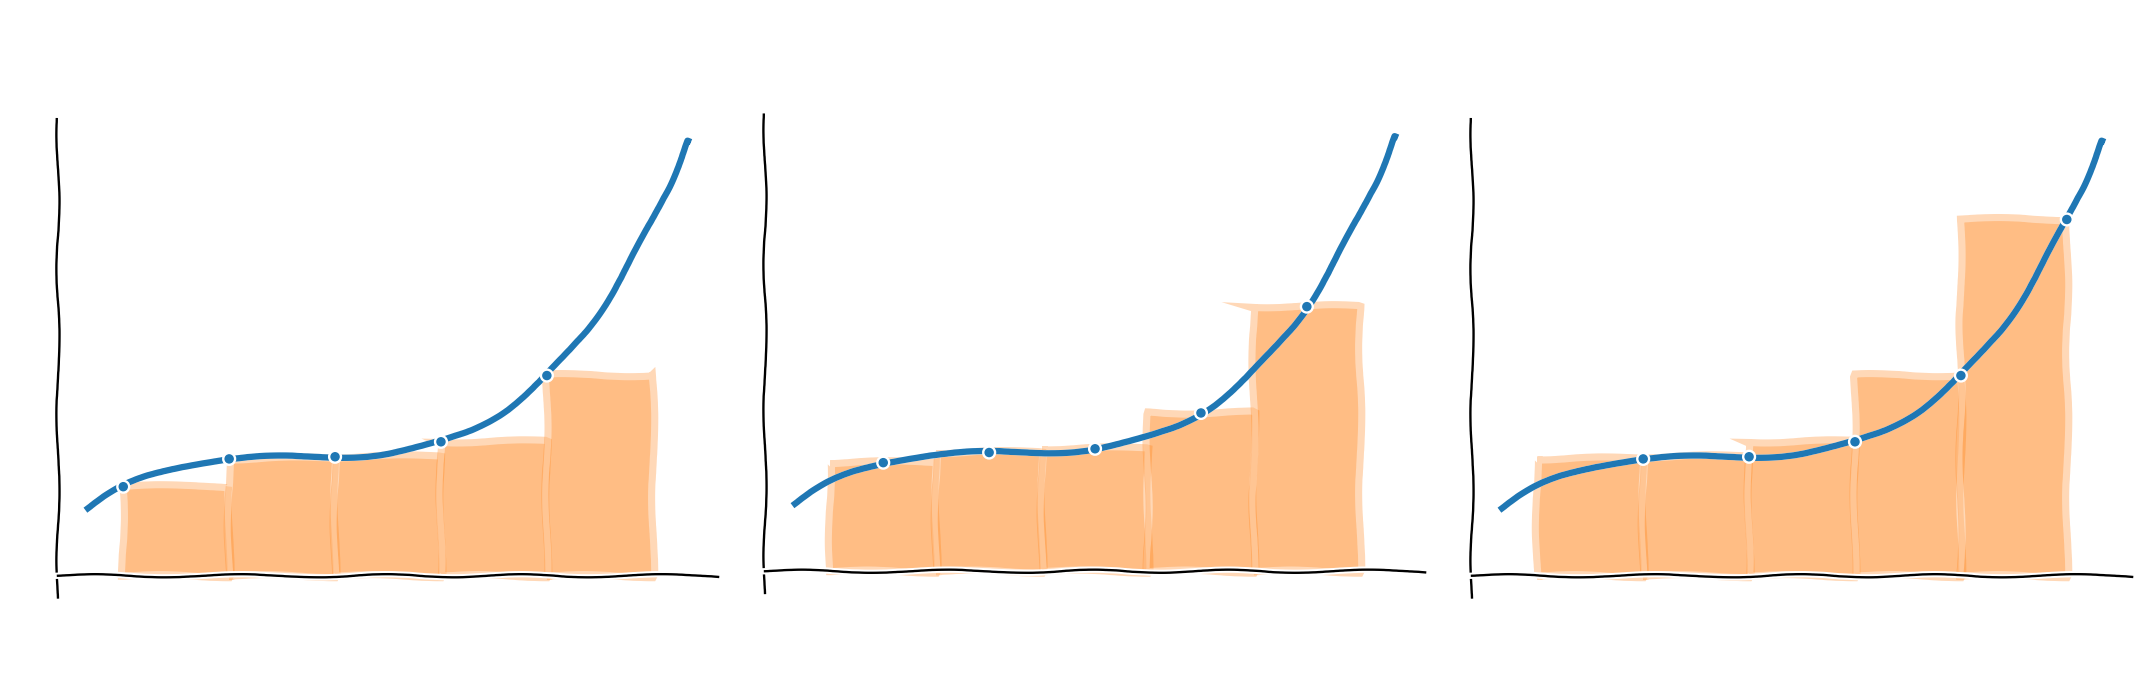

$$
\begin{array}{c|c}
\text { Элементарная квадратура } & \text { Составная квадратура } \\
\hline \int_a^b f(x) d x \approx(b-a) f\left(\frac{a+b}{2}\right) & \int_a^b f(x) d x \approx \sum_{i=1}^N f\left(\frac{x_{i-1}+x_i}{2}\right) \Delta x_i \\
\int_a^b f(x) d x \approx(b-a) f(a) & \int_a^b f(x) d x \approx \sum_{i=1}^N f\left(x_{i-1}\right) \Delta x_i \\
\int_a^b f(x) d x \approx(b-a) f(b) & \int_a^b f(x) d x \approx \sum_{i=1}^N f\left(x_i\right) \Delta x_i
\end{array}
$$

### Составные формулы

Разобьем отрезок $[a,b]$ на равные интервалы длины $h = \frac{b-a}{n}$. Применим к каждому отдельному интервалу формулу прямоугольников

$$
\int_a^b f(x) dx = \sum_{i=1}^n \int_{x_{i-1}}^{x_i} f(x) dx \approx h \sum_{i=1}^{n} f(x_{i-1}).
$$

Применив к каждому формулу трапеций, получаем

$$
\int_a^b f(x) dx = \sum_{i=1}^n \int_{x_{i-1}}^{x_i} f(x) dx \approx 
h \sum_{i=1}^{n} \frac{f(x_{i-1}) + f(x_i)}{2} =\\
= \frac{h}{2} \left(f(x_0) + 2f(x_1) + \dots + 2f(x_{n-1}) + f(x_n)\right)
$$

Объединив интервалы по два и применив к каждой паре формулу Сипсона, получаем

$$
\int_a^b f(x) dx = \sum_{i=1}^{n/2} \int_{x_{2i-2}}^{x_{2i}} f(x) dx \approx 
2h \sum_{i=1}^{n/2} \frac{f(x_{2i-2}) + 4 f(x_{2i-1}) + f(x_{2i})}{6} =\\
= \frac{h}{3} \left(f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \dots + \\
\phantom{z}\qquad\qquad + 4f(x_{n-3}) + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n)\right)
$$

## Теоретическая погрешность составных формул
### Пример расчета погрешности

Определим остаток следующей элементарной квадратуры:

$$
\begin{aligned}
R_k & =\int_{x_{k-1}}^{x_k} f(x) d x-h f\left(x_{k-1}\right) \\
& =\int_{x_{k-1}}^{x_k}\left[f(x)-f\left(x_{k-1}\right)\right] d x
\end{aligned}
$$

Далее ряд Тейлора:

$$
f(x)=f\left(x_{k-1}\right)+f^{\prime}(\xi)\left(x-x_{k-1}\right), \quad \xi \in\left[x_{k-1}, x_k\right]
$$

Итого,

$$
\begin{aligned}
R_k & =f^{\prime}(\xi) \int_{x_{k-1}}^{x_k}\left(x-x_{k-1}\right) d x \\
& =f^{\prime}(\xi) \int_0^h y d y=\frac{1}{2} f^{\prime}(\xi) h^2
\end{aligned}
$$

Пусть $M_1=\max _{x \in[a, b]}\left|f^{\prime}(x)\right|$. Тогда погрешность составной квадратуры будет

$$
\begin{aligned}
\left|R^{(N)}\right|=\left|\sum_{k=1}^N R_k\right| & \leqslant \frac{1}{2} M_1 h^2 N \\
& =\frac{1}{2} M_1(b-a) h
\end{aligned}
$$



## Теоретическая погрешность составных формул
Пусть элементарная квадратурная формула на одном интервале имеет остаточный член вида

$$
R_\text{элем} = C (b-a)^{k+1} f^{(k)}(\xi).
$$

Тогда суммарная ошибка на всех интервалах

$$
R_\text{сост} = C h^{k+1} \sum_{i=1}^n f^{(k)}(\xi_i),\\
|R_\text{сост}| \leqslant C h^{k+1} \sum_{i=1}^n |f^{(k)}(\xi_i)| 
\leqslant C (b-a) h^k \max_{x \in [a,b]} |f^{(k)}(x)|
$$

$p$ | $n$ | Название | Погрешность
-|-|-|-
$0$ | $\forall$ | Прямоугольников | $\frac{(b-a) h}{2} M_1$
$1$ | $\forall$ | Трапеций | $\frac{(b-a) h^2}{12} M_2$
$2$ | $n = 2m$ | Симпсона | $\frac{(b-a) h^4}{180} M_4$
$3$ | $n = 3m$ | Формула 3/8 | $\frac{(b-a) h^4}{80} M_4$

Показатель степени $h$, как обычно, называется __порядком сходимости метода__.

### Точность квадратурных формул

Алгебраической степенью точности квадратурной формулы называют такое число $d$, что квадратурная формула точна для всех многочленов степени $d$, но для некоторых многочленов степени $d+1$ уже не точна. Из вида остаточного члена заключаем, что метод прямоугольников имеет $d=0$, метод трапеций $d=1$, методы Симпсона и 3/8 $d=3$.

### Графики фактических погрешностей для простых квадратур

In [1]:
def rectangle(f, h):
    return h * sum(f[:-1])

def trapezoid(f, h):
    return 0.5 * h * (f[0] + 2 * sum(f[1:-1]) + f[-1])

def simpson(f, h):
    assert (len(f)-1) % 2 == 0
    return h/3. * (f[0] + 4 * sum(f[1:-1:2]) + \
                   2 * sum(f[2:-2:2]) + f[-1])

def threeeights(f, h):
    assert (len(f)-1) % 3 == 0
    return 3*h/8. * (f[0] + 3 * sum(f[1:-1:3]) + \
                3 * sum(f[2:-1:3]) + 2 * sum(f[3:-3:3]) + f[-1])

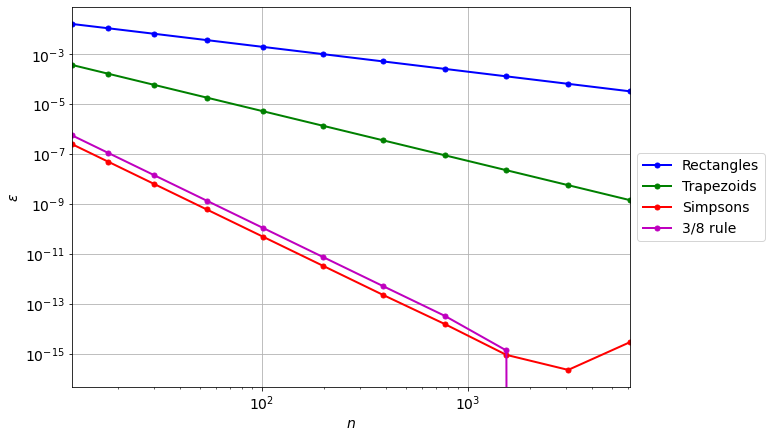

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})

def f(x): return 4 / (1 + x*x)
exact = 4 * np.arctan(0.5)

ns = 6 + 3 * 2**np.arange(1, 12)
errs = []
for n in ns:
    x = np.linspace(0, 0.5, n+1)
    fv = f(x)
    I1 = rectangle(fv, x[1] - x[0])
    I2 = trapezoid(fv, x[1] - x[0])
    I3 = simpson(fv, x[1] - x[0])
    I4 = threeeights(fv, x[1] - x[0])
    errs.append([abs(I1-exact), abs(I2-exact), abs(I3-exact), abs(I4-exact)])

errs=np.array(errs)
    
plt.figure(figsize=(10, 7))
plt.loglog(ns, errs[:, 0], 'b.-', label='Rectangles', lw=2, ms=10)
plt.loglog(ns, errs[:, 1], 'g.-', label='Trapezoids', lw=2, ms=10)
plt.loglog(ns, errs[:, 2], 'r.-', label='Simpson''s', lw=2, ms=10)
plt.loglog(ns, errs[:, 3], 'm.-', label='3/8 rule', lw=2, ms=10)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.xlim(ns[0], ns[-1])
plt.grid()
plt.show()

## Практическая оценка погрешности

Не всегда на практике удается воспользоваться априорной оценкой вида

$$
\varepsilon \leqslant C M_p h^p,
$$

так как не всегда удается оценить $M_p$ для подынтегральной функции. В этом случае, обычно, пользуются правилом Рунге для определения подходящего шага $h$.

### Правило Рунге
Предположим, что нам известен порядок метода $p$, которым мы хотим найти значение интеграла с заданной точностью $\varepsilon$. Тогда результат, вычисленный этим методом с шагом $h$ будет иметь вид

$$
I_h = I^* + \underbrace{C_1 h^p + C_2 h^{p+1} + \dots}_\text{ошибка интегрирования}.
$$

Здесь $I^*$ &mdash; точное значение интеграла. Для достаточно малых $h$ можно записать

$$
I_h = I^* + C_h h^p,
$$

где $C_h$ &mdash; почти константа, то есть слабо зависит от $h$.

Вычислим интеграл с шагом $h$ и с шагом $h/2$:

$$
I_h = I^* + C_1 h^p + C_2 h^{p+1} + \dots\\
I_{h/2} = I^* + C_1 \left(\frac{h}{2}\right)^p + C_2 \left(\frac{h}{2}\right)^{p+1} + \dots
$$

Тогда

$$
I_h - I_{h/2} = C_h h^p - C_{h/2} \left(\frac{h}{2}\right)^p \approx (2^p - 1) C_{h/2} \left(\frac{h}{2}\right)^p = (2^p - 1) (I_{h/2} - I^*)\\
$$

Таким образом, погрешность интегрирования на сетке $h/2$ может быть оценена как

$$
I_{h/2} - I^* \approx \frac{I_h - I_{h/2}}{2^p - 1}.
$$

## Алгоритм оценки погрешности

Алгоритм применения правила Ругне следующий:

1. Задать небольшое число интевалов, скажем $n = 10$
2. Вычислить $I_h, I_{h/2}$ и оценить ошибку

$$
\Delta_{h/2} = \frac{I_h - I_{h/2}}{2^p - 1}.
$$

3. Если $|\Delta_{h/2}| < \varepsilon$, прекратить вычисления. Иначе измельчить сетку вдвое $h := h/2$ и перейти к шагу 2.

4. Ответом служит $I_{h/2}$.

In [7]:
def runge(f, a, b, eps=1e-12):    
    n = 4
    Ih = trapezoid(f(np.linspace(a, b, n+1)), (b-a) / n)
    while True:
        Ih_2 = trapezoid(f(np.linspace(a, b, 2*n+1)), (b-a) / (2*n))
        Dh_2 = (Ih - Ih_2) / (2**2 - 1) # p = 4 для Симпсона
        print('I(h) = %.16f, err(h) = %.6e' % (Ih_2, Dh_2))
        if abs(Dh_2) < eps:
            break
        n *= 2; Ih = Ih_2
        if n > 10000: print('Too large n'); break
    return Ih_2

In [8]:
def f(x): return 1 / (1 + x**2)
a = 0; b = 0.5; exact = np.arctan(b)

runge(f, a, b) - exact

I(h) = 0.4634391975000610, err(h) = -2.087248e-04
I(h) = 0.4635955207839951, err(h) = -5.210776e-05
I(h) = 0.4636345878622866, err(h) = -1.302236e-05
I(h) = 0.4636443537733990, err(h) = -3.255304e-06
I(h) = 0.4636467951975308, err(h) = -8.138080e-07
I(h) = 0.4636474055502108, err(h) = -2.034509e-07
I(h) = 0.4636475581381716, err(h) = -5.086265e-08
I(h) = 0.4636475962851480, err(h) = -1.271566e-08
I(h) = 0.4636476058218907, err(h) = -3.178914e-09
I(h) = 0.4636476082060778, err(h) = -7.947290e-10
I(h) = 0.4636476088021232, err(h) = -1.986818e-10
I(h) = 0.4636476089511367, err(h) = -4.967114e-11
Too large n


-4.966943523143641e-11

### Дополнительные проверки правила Рунге

Для проверки корректности использования правила Рунге достаточно проверять условия
* что метод фактически сходится с порядком $p$,

$$
\frac{\Delta_{h}}{\Delta_{h/2}} \approx 2^p
$$

* что константа $C_h$ слабо зависит от $h$:

$$
C_h = \frac{\Delta_h}{h^p} \to C = \mathrm{const}
$$

* что выполнено эмпирическое правило

$$
\left|2^p \cdot \frac{I_{h/2} - I_h}{I_h - I_{2h}}-1\right|<0.1
$$

In [9]:
def runge_checks(f, a, b, eps=1e-12):
    n = 4
    Ih = simpson(f(np.linspace(a, b, n+1)), (b-a) / n)
    Dh = None;
    while True:
        h_2 = (b-a) / (2*n)
        Ih_2 = simpson(f(np.linspace(a, b, 2*n+1)), h_2)
        Dh_2 = (Ih - Ih_2) / (2**4 - 1) # p = 4 для Симпсона
        Ch_2 = Dh_2 / h_2**4; ps = np.log2(Dh / Dh_2) if Dh != None else np.nan
        print('I(h) = %.16f, err(h) = %.6e, p* = %4.2f, C = %.6e' % \
              (Ih_2, Dh_2, ps, Ch_2))
        if abs(Dh_2) < eps:
            break
        n *= 2; Ih = Ih_2; Dh = Dh_2
        if n > 10000: print('Too large n'); break
    return Ih_2

In [10]:
def f(x): return 1 / (1 + x**2)
a = 0; b = 0.5; exact = np.arctan(b)

runge_checks(f, a, b) - exact

I(h) = 0.4636479223346336, err(h) = 3.157185e-07, p* =  nan, C = 2.069093e-02
I(h) = 0.4636476285453064, err(h) = 1.958596e-08, p* = 4.01, C = 2.053736e-02
I(h) = 0.4636476102217171, err(h) = 1.221573e-09, p* = 4.00, C = 2.049459e-02
I(h) = 0.4636476090771032, err(h) = 7.630759e-11, p* = 4.00, C = 2.048366e-02
I(h) = 0.4636476090055746, err(h) = 4.768578e-12, p* = 4.00, C = 2.048089e-02
I(h) = 0.4636476090011042, err(h) = 2.980246e-13, p* = 4.00, C = 2.048009e-02


2.9809488211185453e-13

## Экстраполяция Ричардсона и алгоритм Ронберга

Вспомним равенство, которое ранее получили:

$$
I_{h/2} - I^* \approx \frac{I_h - I_{h/2}}{2^p - 1}.
$$

Переставляя слагаемые, понимаем, что не изменяя сетку и не делая никаких новых вычислений функции, мы получили более точный метод! Такой метод уточнения точности называется __экстраполяцией Ричардсона__.

$$
I^* \approx I_{h/2} + \frac{I_{h/2} - I_h}{2^p - 1} + O(h^{p+1})
$$

В частности, если мы подставим в выражение выше квадратуру для формулы трапеций, мы получим формулу Симпсона. 

Продолжая эту процедуру далее и далее, получим __алгоритм Ронберга__ уточнения вычисления интеграла.

## Квадратуры Гаусса-Лежандра

До настоящего времени мы рассматривали формулы для численного интегрирования только на равномерных сетках. Это сильно упрощает формулы, но и порождает существенный недостаток этих методов — за счет того, что точки выбираются эквидистантно, происходит быстрое накопление погрешностей аппроксимации. Также чаще приходится вычислять функцию, что в некоторых случаях можнт быть крайне дорогой операцией.

В квадратурах Ньютона-Гаусса мы "варьировали" только коэффициенты $w_i$, тогда как сейчас поиграемся и с положениями узлов $x_i$.

Рассмотрим интегралы на отрезке $[-1, 1]$:

$$
I=\int_{-1}^1 f(x) d x \approx I_G=\sum_{i=0}^{n-1} w_i f\left(x_i\right)
$$

Легко понять, что любая задача может быть сведена к данному виду заменой

$$и
\xi=\frac{1}{2}(b+a)+\frac{1}{2}(b-a) x
$$

$$
\int_a^b f(\xi) d \xi=\left(\frac{b-a}{2}\right) \int_{-1}^1 f(\xi(x)) d x
$$

Используя многочлены Лежандра можно вывести аналитически положения узлов $x_i$ и весов $w_i$, которые подойдут для "любой" заранее заданной функции.


### Таблица значений весов и узлов в Гауссе-Лежандре

$$
\begin{array}{cccc}
\hline \begin{array}{c}
\text { Число точек } n \\
\text { в квадратуре }
\end{array} & \begin{array}{c}
\text { Весовые } \\
\text { коэффициенты }
\end{array} & \begin{array}{c}
\text { Значения } \\
\text { аргумента }
\end{array} & \begin{array}{c}
\text { Погрешность } \\
\text { аппроксимации }
\end{array} \\
\hline 2 & w_0=1,000000000 & x_0=-0.577350269 & \sim f^{(4)}(x) \\
& w_1=1.000000000 & x_1=+0.577350269 & \\
3 & w_0=0.555555556 & x_0=-0.774596669 & \sim f^{(6)}(x) \\
& w_1=0.888888889 & x_1=+0.000000000 & \\
& w_2=0.555555556 & x_2=+0.774596669 & \\
4 & w_0=.0.347854845 & x_0=-0.861136312 & \sim f^{(8)}(x) \\
& w_1=0.652145155 & x_1=-0.339981044 & \\
& w_2=0.652145155 & x_2=+0.339981044 & \\
& w_3=0.347854845 & x_3=+0.861136312 & \\
5 & w_0=0.236926885 & x_0=-0.906179846 & \sim f^{(10)}(x) \\
& w_1=0.478628670 & x_1=-0.538469310 & \\
& w_2=0.568888889 & x_2=+0.000000000 & \\
& w_3=0.478628670 & x_3=+0.538469310 & \\
& w_4=0.236926885 & x_4=+0.906179846 & \\
6 & w_0=0.171324492 & x_0=-.0.932469514 & \sim f^{(12)}(x) \\
& w_1=0.360761573 & x_1=-0.661209386 & \\
& w_2=0.467913935 & x_2=-0.238619186 & \\
& w_3=0.467913935 & x_3=+0.238619186 & \\
& w_4=0.360761573 & x_4=+0.661209386 & \\
& w_5=0.171324492 & x_5=+0.932469514 & \\
\hline
\end{array}
$$

$$
I=\int_{-1}^1 f(x) d x \approx I_G=\sum_{i=0}^{n-1} w_i f\left(x_i\right)
$$

### Пример применения квадратуры Гаусса

Вычислим интеграл

$$
I=\int_0^\pi 4 x^3 d x=\left.x^4\right|_0 ^\pi=\pi^4=97,409091
$$

Используя 2-х точечную квадратуру Гаусса-Лежандра, мы получим численный ответ
$$
I \approx I_G=\frac{(\pi-0)}{2}\left[4\left(\frac{\pi+0}{2}-\frac{\pi-0}{2 \sqrt{3}}\right)^3+4\left(\frac{\pi+0}{2}+\frac{\pi-0}{2 \sqrt{3}}\right)^3\right]=97,409091
$$

6 знаков после запятой, вычислив функцию всего 2 раза! (Это не всегда так, к сожелению :()

## Квадратуры Гаусса-Лежандра

### Достоинства

- Требуется малое количество вычислений подынтегральной функции (обычно $n=10$ хватает для всего)
- Маленькая погрешность аппроксимации из-за малого количества арифметических действий
- Ну вообще крутой метод, правда же

### Недостатки

- Требуется вычисление функции в определенных точках, что не всегда осуществимо на практике

## Интегралы с особенностями

Для интегралов с особенностями, наши методы напрямую неприменимы - слишком большие числа при сложении с маленькими своей погрешностью уничтожат любыe надежды на хороший ответ. К примеру, такой интеграл

$$
\int_0^1 \frac{f(x)}{\sqrt{x}} d x
$$

В этом случае можно выделить особенность в нуле при помощи простого преобразования

$$
\int_0^1 \frac{f(x)}{\sqrt{x}} d x=\int_0^1 \frac{f(x)-\varphi(x)}{\sqrt{x}} d x+\int_0^1 \frac{\varphi(x)}{\sqrt{x}} d x
$$

где функция $\varphi(x)$ выбирается так, чтобы первый интеграл в правой части не содержал особенности, а второй - вычислялся аналитически. Это справедливо, например, если в качестве $\varphi(x)$ взять отрезок разложения функции $f(x)$ в ряд Тейлора в точке $x=0$. Тогда

$$
\int_0^1 \frac{f(x)-f(0)-x f^{\prime}(0)}{\sqrt{ x}} d x+f(0) \int_0^1 \frac{1}{\sqrt{x}} d x+f^{\prime}(0) \int_0^1 \sqrt{x} d x .
$$

Аля перенормировка, только второе слагаемое не бесконечное :).

## Интегралы от быстроосциллирующих функций

Проблемы интегралов быстроосциллирующих функций:

- Большое количество вычислительных затрат, т.к. шаг интегрирования должен быть много меньше периода
- Быстрое накопление ошибки аппроксимации из-за суммирования слагаемых с разными знаками (на разных полупериодах)

На практике, тут стараются всё свести к аналитическим вычислениям.

__Пример.__ Рассмотрим вычисление интеграла

$$
\int_0^\pi f(x) \sin k x d x
$$

где $k$ - большое число, например, $1000$. Аппроксимируем гладкую функцию $f(x)$ другой гладкой функцией $\varphi(x)$, для которой интеграл (2.10) вычисляется аналитически. Тогда задача вычисления интеграла от $f(x) \sin k x$ сводится к вычислению

$$
\int_0^\pi f(x) \sin k x=\int_0^\pi \varphi(x) \sin k x d x+\int_0^\pi[f(x)-\varphi(x)] \sin k x d x .
$$

Если в качестве $\varphi(x)$ взять разложение $f(x)$ в ряд Тейлора, то второе слагаемое справа, как правило, мало и им можно пренебречь.

## Квадратуры Гаусса-Кристофеля

В некоторых приложениях возникает необходимость вычисления интегралов с заданной весовой функцией $w(x)$: 

$$\int_a^b f(x) w(x) d x$$ 

При некотором наборе весовых функций могут оказаться полезными квадратурные формулы Гаусса-Кристоффеля вида

$$
\int_a^b f(x) w(x) d x=\sum_{i=1}^n c_i f\left(x_i\right) .
$$

__Теорема__. Квадратурная формула выше точна для многочленов степени не выше $2 n-1$, если
- ее узлами $x_i$ являются корни многочлена $p_n(x)$ из семейства многочленов, ортогональных на промежутке интегрирования $(a, b)$ с весом $w(x)$: 

$$
\left\langle p_k \cdot p_m\right\rangle=\int_a^b p_k(x) p_m(x) \omega(x) d x=0, \quad m \neq k
$$

- весовыми коэффициентами являются числа

$$
c_i=\int_{a}^b \frac{\left(x-x_1\right)\left(x-x_2\right) \ldots\left(x-x_{i-1}\right)\left(x-x_{i+1}\right) \ldots\left(x-x_n\right)}{\left(x_i-x_1\right)\left(x_i-x_2\right) \ldots\left(x_i-x_{i-1}\right)\left(x_i-x_{i+1}\right) \ldots\left(x_i-x_n\right)} w(x) d x .
$$

Таблица с видами весового коэффициента, и какие к ним брать многочлены.

|  | $p_n(x)$ | $\omega(x)$ | $a, b$ |
|---|---|---|---|
|  Legendre  | $P_n(x)$ | 1 | -1,1 |
| Hermite  | $H_n(x)$ | $e^{-x^2}$ | - ထ, ထ  |
| Chebyshev I kind | $T_n(x)$ | $\frac{1}{\sqrt{1-x^2}}$ | -1,1 |
| Chebyshev II kind | $U_n(x)$ | $\sqrt{1-x^2}$ | -1,1 |
| Laguerre| $L_n^{(\alpha)}(x)$ | x^\alpha e^{-x} | 0, ထ |

